## Installing and Importing packages

In [1]:
#upgrading the tensor flow to version 2.1.0
!pip install tensorflow==2.1.0


     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 3.9MB 48.9MB/s 
     |████████████████████████████████| 450kB 50.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=dd9d878a3efc7a002f49dd201f39deb85ab3ddaba5dedb766216abc5c0b6af55
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc

In [1]:
 #Importing and checking tensorflow version
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
#Loading required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import glob
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Dense,Dropout,Conv2D,GlobalMaxPooling2D,MaxPooling2D,Flatten,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## Loading the 1270 pictures and their labels and preprocessing

In [0]:
# Downloading data and converting the path string to Path
data_dir=tf.keras.utils.get_file(origin='http://up.iranblog.com/uploads/Jewellery_8c345.zip',
                        fname='jewellery',
                        extract=True)
data_dir = pathlib.Path(data_dir)

In [0]:
data_dir

PosixPath('/root/.keras/datasets/jewellery')

In [0]:
#Counting total number of images
image_count = len(list(data_dir.parent.glob('Jewellery/*/*.jpg')))
image_count

1270

In [0]:
# The class names which are also the name of each folder that images are in
class_names = np.array([item.name for item in data_dir.parent.glob('Jewellery/*')])
class_names

array(['ring', 'bracelet', 'earring', 'necklace'], dtype='<U8')

In [0]:
x=[]
y=[]
for i in (data_dir.parent.glob('Jewellery/*/*.jpg')):
  b=(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(i,target_size=(200,200))))/255.0
  c=i.parent.parts[-1]
  x.append(b)
  y.append(c)
x=np.array(x)
y=np.array(y)  

In [0]:
x.shape

(1270, 200, 200, 3)

In [0]:
y.shape

(1270,)

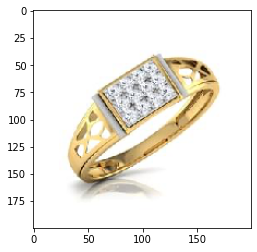

In [0]:
plt.imshow(x[0])

In [0]:
y[0]

'ring'

In [0]:
# Encoding the y labels
le=LabelEncoder()
y=le.fit_transform(y)

In [0]:
le.classes_

array(['bracelet', 'earring', 'necklace', 'ring'], dtype='<U8')

In [0]:
y[0]

3

In [0]:
# Dividing the original data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [0]:
# Deviding the train data into the train and validation data
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.125,random_state=42)


In [0]:
x_train.shape

(889, 200, 200, 3)

In [0]:
y_train.shape

(889,)

In [0]:
x_val.shape

(127, 200, 200, 3)

In [0]:
y_val.shape

(127,)

In [0]:
x_test.shape

(254, 200, 200, 3)

In [0]:
y_test.shape

(254,)

## A Simple CNN Model

In [0]:
model1=Sequential()
model1.add(Input(shape=x_train[0].shape))
model1.add(Conv2D(filters=64,kernel_size=5,activation='relu'))
model1.add(Flatten())
model1.add(Dense(4,activation='softmax'))

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)

Train on 889 samples, validate on 127 samples
Epoch 1/20
889/889 [==============================] - 41s 46ms/sample - loss: 53.0503 - accuracy: 0.3870 - val_loss: 1.0882 - val_accuracy: 0.4882
Epoch 2/20
889/889 [==============================] - 40s 45ms/sample - loss: 0.8129 - accuracy: 0.7627 - val_loss: 0.4548 - val_accuracy: 0.8661
Epoch 3/20
889/889 [==============================] - 40s 45ms/sample - loss: 0.7688 - accuracy: 0.8155 - val_loss: 0.7910 - val_accuracy: 0.7953
Epoch 4/20
889/889 [==============================] - 40s 45ms/sample - loss: 0.5237 - accuracy: 0.8751 - val_loss: 0.3354 - val_accuracy: 0.9291
Epoch 5/20
889/889 [==============================] - 40s 45ms/sample - loss: 0.3589 - accuracy: 0.9156 - val_loss: 0.3127 - val_accuracy: 0.9134
Epoch 6/20
889/889 [==============================] - 40s 45ms/sample - loss: 0.1594 - accuracy: 0.9595 - val_loss: 0.2825 - val_accuracy: 0.9055
Epoch 7/20
889/889 [==============================] - 40s 45ms/sample - loss:

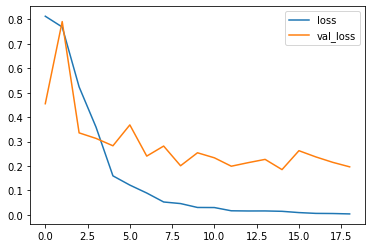

In [0]:
plt.plot(r.history['loss'][1:],label='loss')
plt.plot(r.history['val_loss'][1:],label='val_loss')
plt.legend();

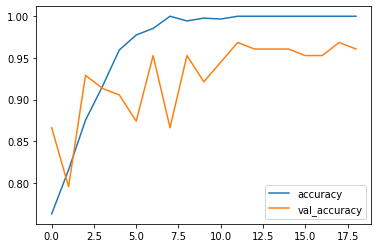

In [0]:
plt.plot(r.history['accuracy'][1:],label='accuracy')
plt.plot(r.history['val_accuracy'][1:],label='val_accuracy')
plt.legend();

In [0]:
# Confusion Matrix
tf.math.confusion_matrix(y_val,model1.predict_classes(x_val))

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[23,  0,  1,  1],
       [ 0, 57,  0,  0],
       [ 0,  0, 25,  0],
       [ 1,  1,  1, 17]], dtype=int32)>

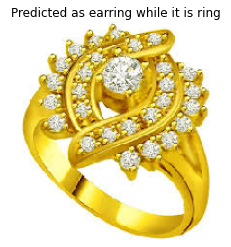

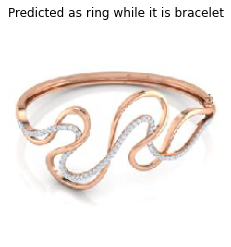

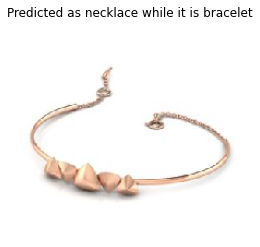

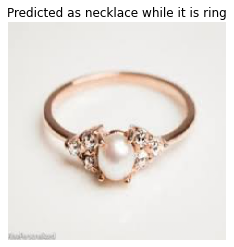

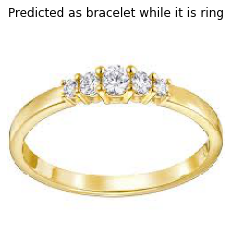

In [0]:
# Dict for encoded labels to the catergories
dict1={0: 'bracelet',
       1: 'earring',
       2: 'necklace',
       3: 'ring'}
# Finding which pictures are missclassified
missclassified=np.where(y_val!=model1.predict_classes(x_val))[0]
counter=0
for fig_number in missclassified:
  plt.imshow(x_val[fig_number])
  plt.title('Predicted as {} while it is {}'.format(dict1[model1.predict_classes(x_val)[fig_number]],dict1[y_val[fig_number]]))
  counter=counter+1
  plt.axis('off')
  plt.show()

In [0]:
# Confusion Matrix for test data
tf.math.confusion_matrix(y_test,model1.predict_classes(x_test))

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[65,  3,  3,  0],
       [ 1, 83,  0,  1],
       [ 1,  2, 58,  2],
       [ 0,  1,  1, 33]], dtype=int32)>

In [0]:
# accuracy for test data
m = tf.keras.metrics.Accuracy() 
_ = m.update_state(y_test,model1.predict_classes(x_test) ) 
m.result().numpy() 

0.9409449

In [0]:
model1.save('jewleery_classification.h5')

In [0]:
#tf.keras.models.load_model('jewleery_classification.h5')

In [0]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 196, 196, 64)      4864      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2458624)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 9834500   
Total params: 9,839,364
Trainable params: 9,839,364
Non-trainable params: 0
_________________________________________________________________


From the above result, we can see that although the result is quite good, but because the number of image is low, our model may not be able to classify the the pictures that are quite different than these ones.

## Adding Much More Pictures and Modelling

More than 13000 new images have been found and added to the original dataset, that we used in the previous sections. Right now, we have more that 14000 images for train,validation and test. In this section, we want to try to develop a new simple model and probably adding more filters and layers.

In [0]:
# Downloading data and converting the path string to Path
# If you received 403 Forbidden error, please start the download manually using download manager manually and immediately cancel that and run this cell again.
large_data_dir=tf.keras.utils.get_file(origin='http://up.iranblog.com/uploads/New-Images.zip',
                        fname='new_images',
                        extract=True)
large_data_dir = pathlib.Path(large_data_dir)

In [4]:
large_data_dir

PosixPath('/root/.keras/datasets/new_images')

In [5]:
new_image_count = len(list(large_data_dir.parent.glob('New Images/*/*.jpg')))
new_image_count

14409

In [6]:
class_names = np.array([item.name for item in large_data_dir.parent.glob('New Images/*')])
class_names

array(['necklace', 'earring', 'ring', 'bracelet'], dtype='<U8')

In [0]:
# If you have more memory, please uncomment this cell otherwise run the next cell instead of this.
# x_new=[]
# y_new=[]
# for i in (large_data_dir.parent.glob('New Images/*/*.jpg')):
#   b=(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(i,target_size=(200,200))))/255.0
#   c=i.parent.parts[-1]
#   x_new.append(b)
#   y_new.append(c)
# x_new=np.array(x_new)
# y_new=np.array(y_new)  

In [0]:
x_new=np.empty(shape=(new_image_count,200,200,3),dtype=np.float16)
y_new=np.empty(shape=(new_image_count,),dtype='U8')
counter=0
for i in (sorted(large_data_dir.parent.glob('New Images/*/*.jpg'))):
  b=(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(i,target_size=(200,200))))/255.0
  c=i.parent.parts[-1]
  x_new[counter]=b
  y_new[counter]=c
  counter+=1

In [8]:
x_new.shape

(14409, 200, 200, 3)

In [9]:
y_new.shape

(14409,)

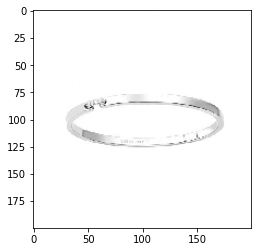

In [11]:
plt.imshow(x_new[0].astype(np.float32))

In [12]:
y_new[0]

'bracelet'

In [0]:
# Encoding the y_new labels
le=LabelEncoder()
y_new=le.fit_transform(y_new)

In [14]:
y_new[0]

0

In [0]:
# Dividing the original data into train and test data
x_new_train,x_new_test,y_new_train,y_new_test=train_test_split(x_new,y_new,test_size=0.2,random_state=42)

In [0]:
# Deviding the train data into the train and validation data
x_new_train,x_new_val,y_new_train,y_new_val=train_test_split(x_new_train,y_new_train,test_size=0.125,random_state=42)


In [17]:
x_new_train.shape

(10086, 200, 200, 3)

In [18]:
y_new_train.shape

(10086,)

In [19]:
x_new_val.shape

(1441, 200, 200, 3)

In [20]:
y_new_val.shape

(1441,)

In [21]:
x_new_test.shape

(2882, 200, 200, 3)

In [22]:
y_new_test.shape

(2882,)

### A simple new CNN Modelling for the new dataset 

In [0]:
model2=Sequential()
model2.add(Input(shape=x_new_train[0].shape))
model2.add(Conv2D(filters=64,kernel_size=5,activation='relu'))
model2.add(Flatten())
model2.add(Dense(4,activation='softmax'))

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r_new = model2.fit(x_new_train, y_new_train, validation_data=(x_new_val, y_new_val), epochs=30)

Train on 10086 samples, validate on 1441 samples
Epoch 1/30
10086/10086 [==============================] - 80s 8ms/sample - loss: 4.1285 - accuracy: 0.4729 - val_loss: 1.2649 - val_accuracy: 0.4171
Epoch 2/30
10086/10086 [==============================] - 75s 7ms/sample - loss: 1.2379 - accuracy: 0.5465 - val_loss: 1.1588 - val_accuracy: 0.6398
Epoch 3/30
10086/10086 [==============================] - 79s 8ms/sample - loss: 0.8543 - accuracy: 0.7450 - val_loss: 0.7624 - val_accuracy: 0.7890
Epoch 4/30
10086/10086 [==============================] - 81s 8ms/sample - loss: 0.4085 - accuracy: 0.8764 - val_loss: 0.6821 - val_accuracy: 0.8279
Epoch 5/30
10086/10086 [==============================] - 68s 7ms/sample - loss: 0.2144 - accuracy: 0.9379 - val_loss: 0.8339 - val_accuracy: 0.8105
Epoch 6/30
10086/10086 [==============================] - 68s 7ms/sample - loss: 0.1692 - accuracy: 0.9504 - val_loss: 0.7715 - val_accuracy: 0.8279
Epoch 7/30
10086/10086 [==============================] -

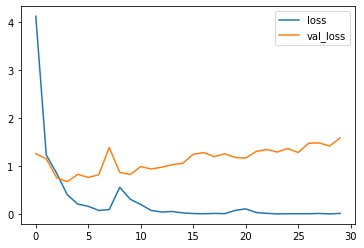

In [0]:
plt.plot(r_new.history['loss'],label='loss')
plt.plot(r_new.history['val_loss'],label='val_loss')
plt.legend();

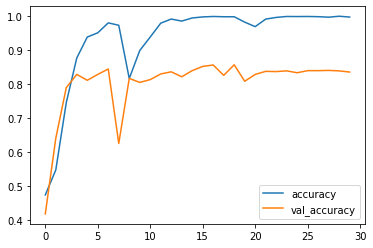

In [0]:
plt.plot(r_new.history['accuracy'],label='accuracy')
plt.plot(r_new.history['val_accuracy'],label='val_accuracy')
plt.legend();

## More Complex CNN model

It seems that in order to increase the level of validation accuracy, we need more complicated model 

In [31]:
np.random.seed(42)
tf.random.set_seed(42)

# Adding Layers
model3=Sequential()
model3.add(Input(shape=x_new_train[0].shape))
model3.add(Conv2D(filters=32,kernel_size=3,strides=2,activation='relu',padding='same'))
model3.add(Conv2D(filters=64,kernel_size=3,strides=2,activation='relu',padding='same'))
model3.add(Conv2D(filters=128,kernel_size=3,strides=2,activation='relu',padding='same'))
model3.add(Conv2D(filters=256,kernel_size=3,strides=2,activation='relu',padding='same'))
model3.add(Conv2D(filters=512,kernel_size=3,strides=2,activation='relu',padding='same'))

model3.add(Flatten())
model3.add(Dropout(0.2,seed=42))
model3.add(Dense(256,activation='relu'))
model3.add(Dropout(0.2,seed=42))

model3.add(Dense(4,activation='softmax'))

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Adding early stopping criteria
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)

# Modifying learning rate when the validation accuracy reaches a plateau
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=3,verbose=1)

# Adding checkpoint to save the best model after early stopping
checkpoint=tf.keras.callbacks.ModelCheckpoint('best_model_2.h5',monitor='val_accuracy',save_best_only=True)

#fitting the model
r_new_3 = model3.fit(x_new_train, y_new_train, validation_data=(x_new_val, y_new_val), epochs=30,callbacks=[early_stopping,checkpoint,reduce_lr])

Train on 10086 samples, validate on 1441 samples
Epoch 1/30
10086/10086 [==============================] - 340s 34ms/sample - loss: 0.9514 - accuracy: 0.5927 - val_loss: 0.4109 - val_accuracy: 0.8536
Epoch 2/30
10086/10086 [==============================] - 344s 34ms/sample - loss: 0.4068 - accuracy: 0.8531 - val_loss: 0.2784 - val_accuracy: 0.9105
Epoch 3/30
10086/10086 [==============================] - 343s 34ms/sample - loss: 0.2968 - accuracy: 0.8929 - val_loss: 0.2296 - val_accuracy: 0.9257
Epoch 4/30
10086/10086 [==============================] - 341s 34ms/sample - loss: 0.2175 - accuracy: 0.9224 - val_loss: 0.2242 - val_accuracy: 0.9216
Epoch 5/30
10086/10086 [==============================] - 340s 34ms/sample - loss: 0.1781 - accuracy: 0.9367 - val_loss: 0.2070 - val_accuracy: 0.9278
Epoch 6/30
10086/10086 [==============================] - 340s 34ms/sample - loss: 0.1472 - accuracy: 0.9483 - val_loss: 0.2098 - val_accuracy: 0.9382
Epoch 7/30
10086/10086 [=====================

In [45]:
model3.evaluate(x_new_val,y_new_val)

1441/1441 [==============================] - 14s 9ms/sample - loss: 0.2670 - accuracy: 0.9452


[0.2670340282761083, 0.94517696]

In [0]:
#Loading the epoch with the best accuracy
model3=tf.keras.models.load_model('best_model_accuracy.h5')

In [0]:
model3.save('best_model_accuracy.h5')

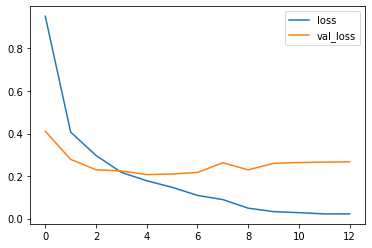

In [32]:
plt.plot(r_new_3.history['loss'],label='loss')
plt.plot(r_new_3.history['val_loss'],label='val_loss')
plt.legend();

In [0]:
pd.DataFrame({'epoch':list(range(1,14)),
              'learning_rate':r_new_3.history['lr'],
              'train_loss':r_new_3.history['loss'],
              'val_loss':r_new_3.history['val_loss'],
              'train_accuracy':r_new_3.history['accuracy'],
              'test_accuracy':r_new_3.history['val_accuracy']}).to_csv('metrics.csv',index=False)

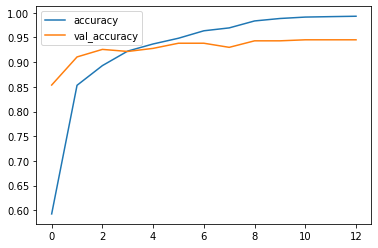

In [33]:
plt.plot(r_new_3.history['accuracy'],label='accuracy')
plt.plot(r_new_3.history['val_accuracy'],label='val_accuracy')
plt.legend();

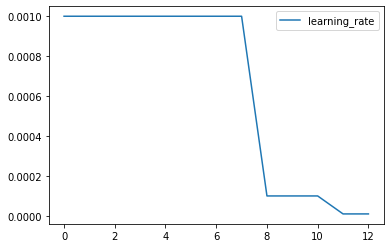

In [34]:
plt.plot(r_new_3.history['lr'],label='learning_rate')
plt.legend();

In [53]:
# The accuracy on the test data
model3.evaluate(x_new_test,y_new_test)

2882/2882 [==============================] - 27s 10ms/sample - loss: 0.3462 - accuracy: 0.9351


[0.34622218791652937, 0.9351145]

In [58]:
tf.math.confusion_matrix(y_new_test,model3.predict_classes(x_new_test))

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[612,  20,  15,  33],
       [ 11, 689,   8,  11],
       [ 21,  10, 689,  11],
       [ 30,  10,   7, 705]], dtype=int32)>

Predicted as a/an ring while it is a/an bracelet


(-0.5, 199.5, 199.5, -0.5)

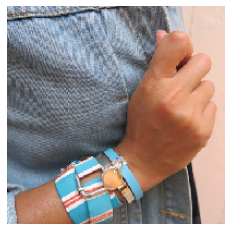

In [56]:
dict1={0: 'bracelet',
       1: 'earring',
       2: 'necklace',
       3: 'ring'}
missclass_index=np.where(y_new_test!=model3.predict_classes(x_new_test))[0]
random_index=np.random.choice(missclass_index)
plt.imshow(x_new_test[random_index].astype(np.float32))
print('Predicted as a/an {} while it is a/an {}'.format(dict1[model3.predict_classes(x_new_test)[random_index]],dict1[y_new_test[random_index]]))
plt.axis('off')